In [31]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
#from mpldatacursor import datacursor
from IPython.display import Audio
import sys

notice that this epoch_mapping function is faulty and the correct implementation should be found in other_lab5.ipynb.

In [32]:
def epoch_remapping(audio_data, N, new_epoch_spacing, epoch_marks_orig):
    """ 
    Description: A function for remapping epochs and generating new audio samples based on new epoch spacing
    """
    audio_out = np.zeros(N)
    # Suggested loop
    curr_epoch = 0 # idx of epoch in original epoch array, not idx of epoch in original data
    new_epoch = 0
    for i in range(0, N, new_epoch_spacing):

        # https://courses.engr.illinois.edu/ece420/lab5/lab/#overlap-add-algorithm
        # Your OLA code here
        
        curr_epoch_idx = 0 # corresponds to the original epoch's sample idx in the original audio data
        new_epoch = curr_epoch # assume the epoch we work with next iteration is the same as the current epoch

        # determine based on distance if we need to map to a new epoch
        if curr_epoch + 1 < len(epoch_marks_orig):
            # check which original epoch we want to map to the new epoch
            first_epoch_idx = epoch_marks_orig[curr_epoch]
            # second_epoch_idx = epoch_marks_orig[curr_epoch]
            # if abs(first_epoch_idx - i) <= abs(second_epoch_idx - i):
            #     curr_epoch_idx = first_epoch_idx
            # else:
            #     new_epoch += 1 # want to advance the current original epoch

            curr_epoch_idx = first_epoch_idx
        else:
            # can't advance epochs anymore so just use the last one
            curr_epoch_idx = epoch_marks_orig[curr_epoch]
        
        left_epoch_idx = 0
        right_epoch_idx = 0
        # calculate P0 for current original epoch
        if curr_epoch == 0:
            left_epoch_idx = 0
        else:
            left_epoch_idx = epoch_marks_orig[curr_epoch - 1]
        
        if curr_epoch == len(epoch_marks_orig)-1:
            right_epoch_idx = len(audio_data)-1
        else:
            right_epoch_idx = epoch_marks_orig[curr_epoch + 1]

        p0 = int((right_epoch_idx - left_epoch_idx) / 2)

        # create hanning window to be applied to original epoch
        window_len = int(2*p0 + 1)
        window = [0.5*(1 - np.cos((2*np.pi*l) / window_len)) for l in range(window_len)]

        # apply window to original epoch and add its result around the new epoch location
        for j in range(2*p0 + 1):
            windowed_idx = j # index into window
            audio_data_idx = (curr_epoch_idx - p0) + j # data to use centered around original epoch
            audio_out_idx = (i - p0) + j # location to add windowed data centered around new epoch
            # only sum overlapped data if indices are valid
            if audio_out_idx < len(audio_out) and audio_data_idx < len(audio_data):
                audio_out[audio_out_idx] += window[windowed_idx] * audio_data[audio_data_idx]

        # update the new original epoch we are working with 
        curr_epoch = new_epoch
    
    return audio_out

[172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172,

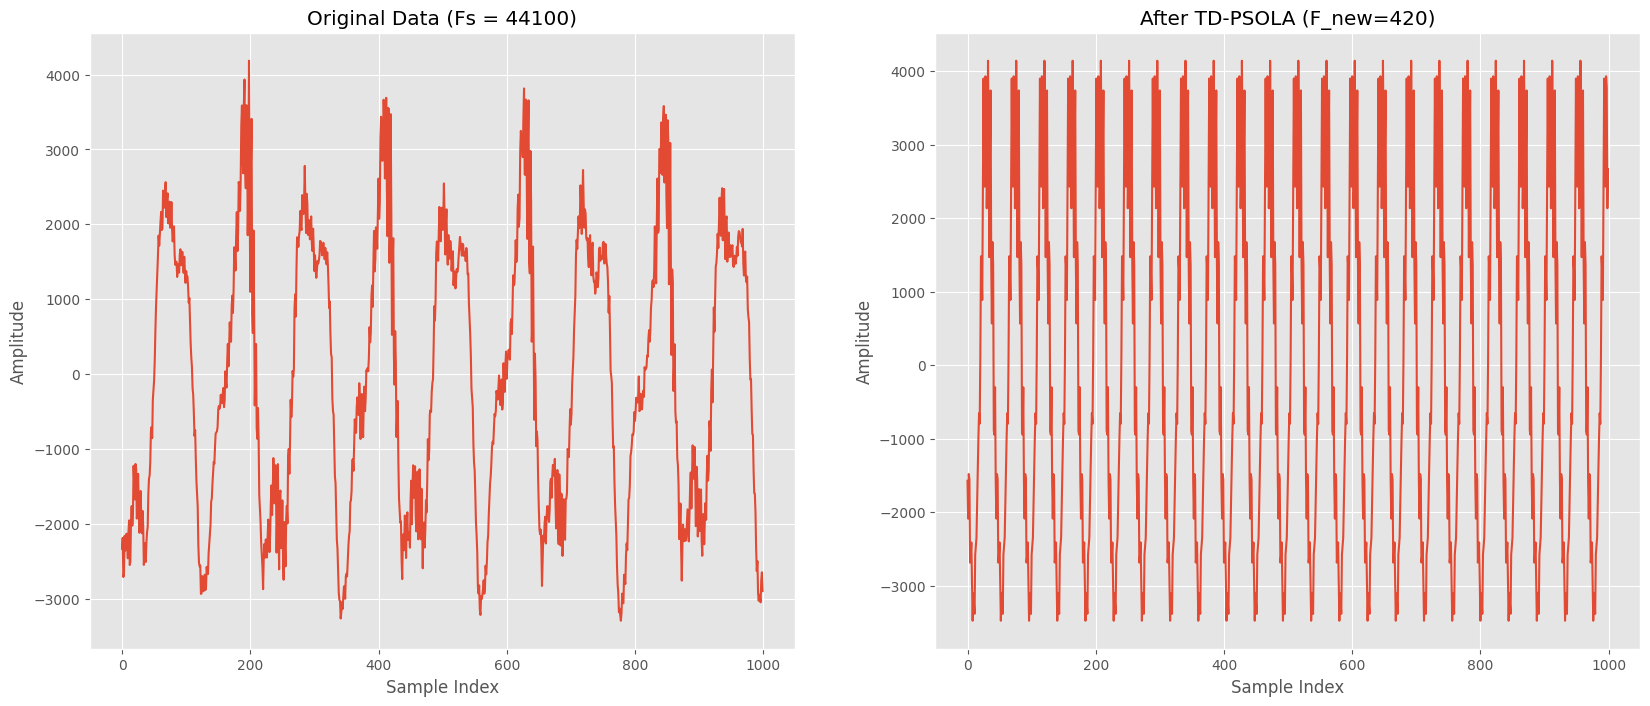

In [34]:
plt.style.use('ggplot')

# Note: this epoch list only holds for "test_vector_all_voiced.wav"
epoch_marks_orig = np.load("test_vector_all_voiced_epochs.npy")
F_s, audio_data = spwav.read("test_vector_all_voiced.wav")
N = len(audio_data)

######################## YOUR CODE HERE ##############################

F_new = 1000
new_epoch_spacing = int(F_s / F_new)

audio_out = epoch_remapping(audio_data, N, new_epoch_spacing, epoch_marks_orig)

# print(epoch_marks_orig)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(audio_data[10000:11000])
plt.title(f"Original Data (Fs = {F_s})")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_data[epoch_marks_orig[:50]], c='blue')

plt.subplot(122)
plt.plot(audio_out[10000:11000])
plt.title("After TD-PSOLA (F_new=420)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_out[epoch_marks_orig[:50]], c='blue')
plt.show()

In [ ]:
# original audio
Audio(audio_data, rate=F_s)

In [ ]:
# audio with F_new == 420
Audio(audio_out, rate=F_s)

In [ ]:
# saving output file for reference
spwav.write("audio_out.wav", rate = F_s, data=audio_out.astype(np.int16))

In [ ]:
# Testing with different epoch spacings
F_news = [100, 200, 300, 400]
new_epoch_spacings = [int(F_s / F_news[i]) for i in range(len(F_news))]
audio_outs = []

for i in range(len(F_news)):
    audio_outs.append(epoch_remapping(audio_data, N, new_epoch_spacings[i], epoch_marks_orig))

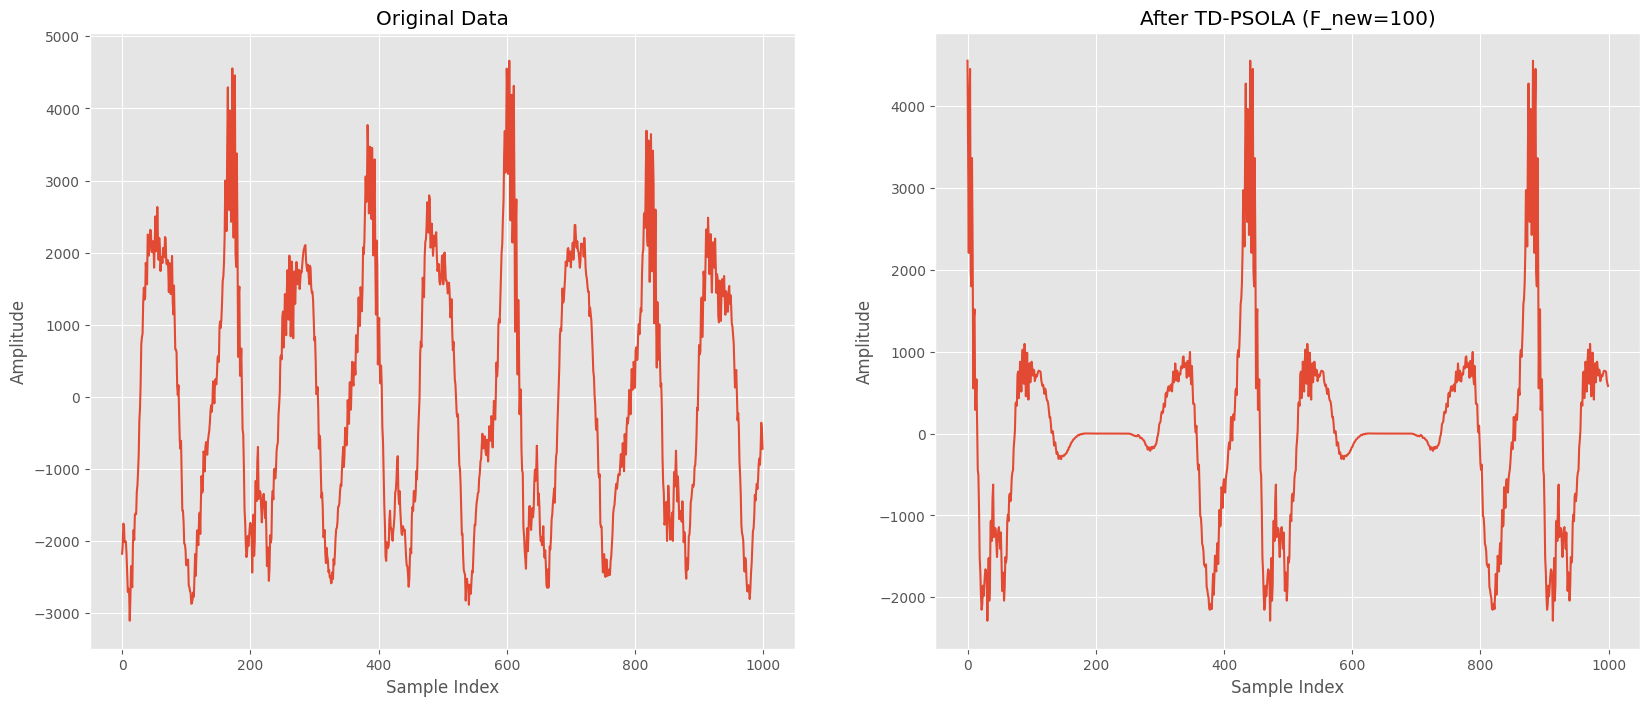

In [ ]:
# print(epoch_marks_orig)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(audio_data[:1000])
plt.title("Original Data")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_data[epoch_marks_orig[:50]], c='blue')

plt.subplot(122)
plt.plot(audio_outs[0][:1000])
plt.title("After TD-PSOLA (F_new=100)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_out[epoch_marks_orig[:50]], c='blue')
plt.show()

In [ ]:
# audio with F_new == 100
Audio(audio_outs[0], rate=F_s)

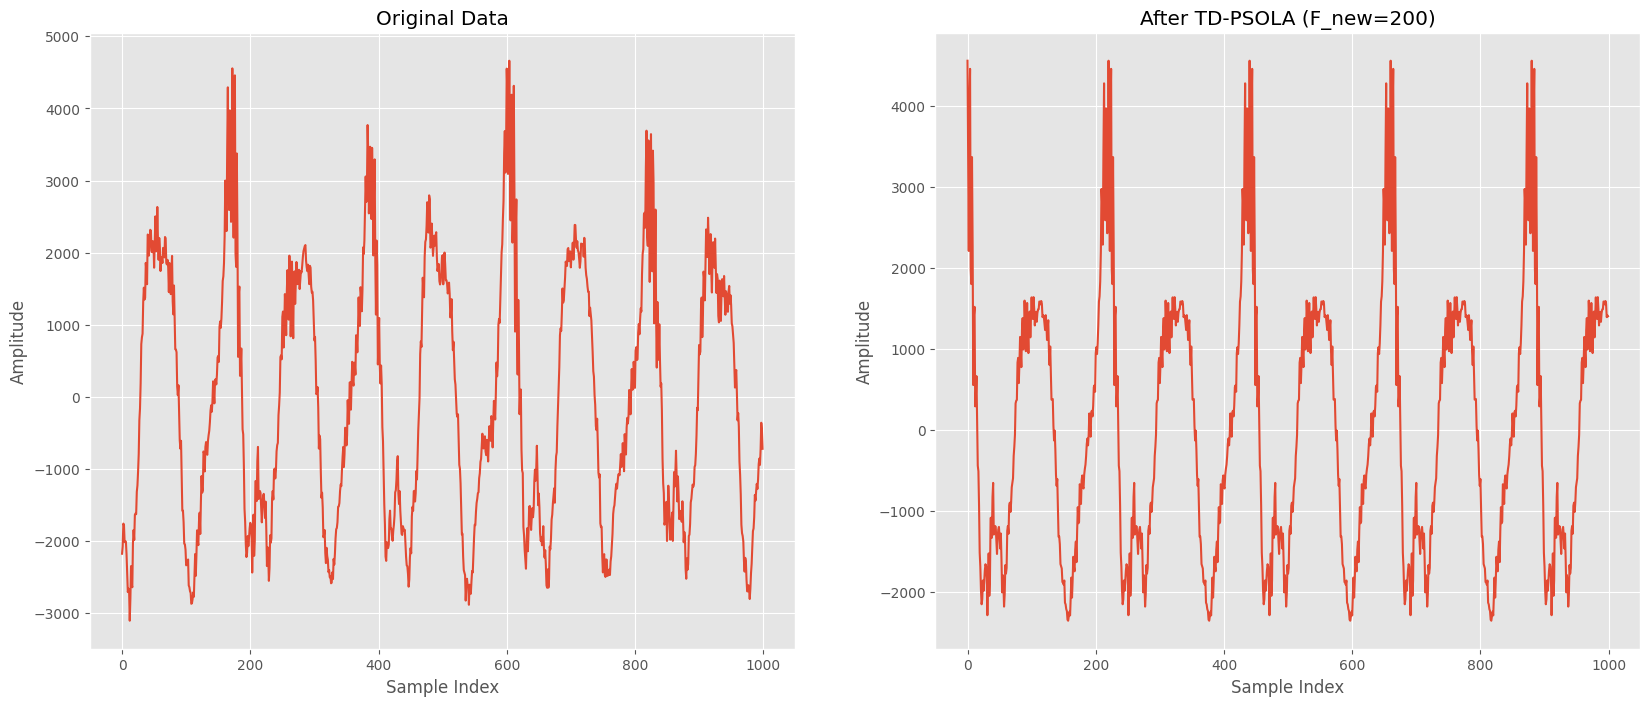

In [ ]:
# print(epoch_marks_orig)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(audio_data[:1000])
plt.title("Original Data")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_data[epoch_marks_orig[:50]], c='blue')

plt.subplot(122)
plt.plot(audio_outs[1][:1000])
plt.title("After TD-PSOLA (F_new=200)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_out[epoch_marks_orig[:50]], c='blue')
plt.show()

In [ ]:
# audio with F_new == 200
Audio(audio_outs[1], rate=F_s)

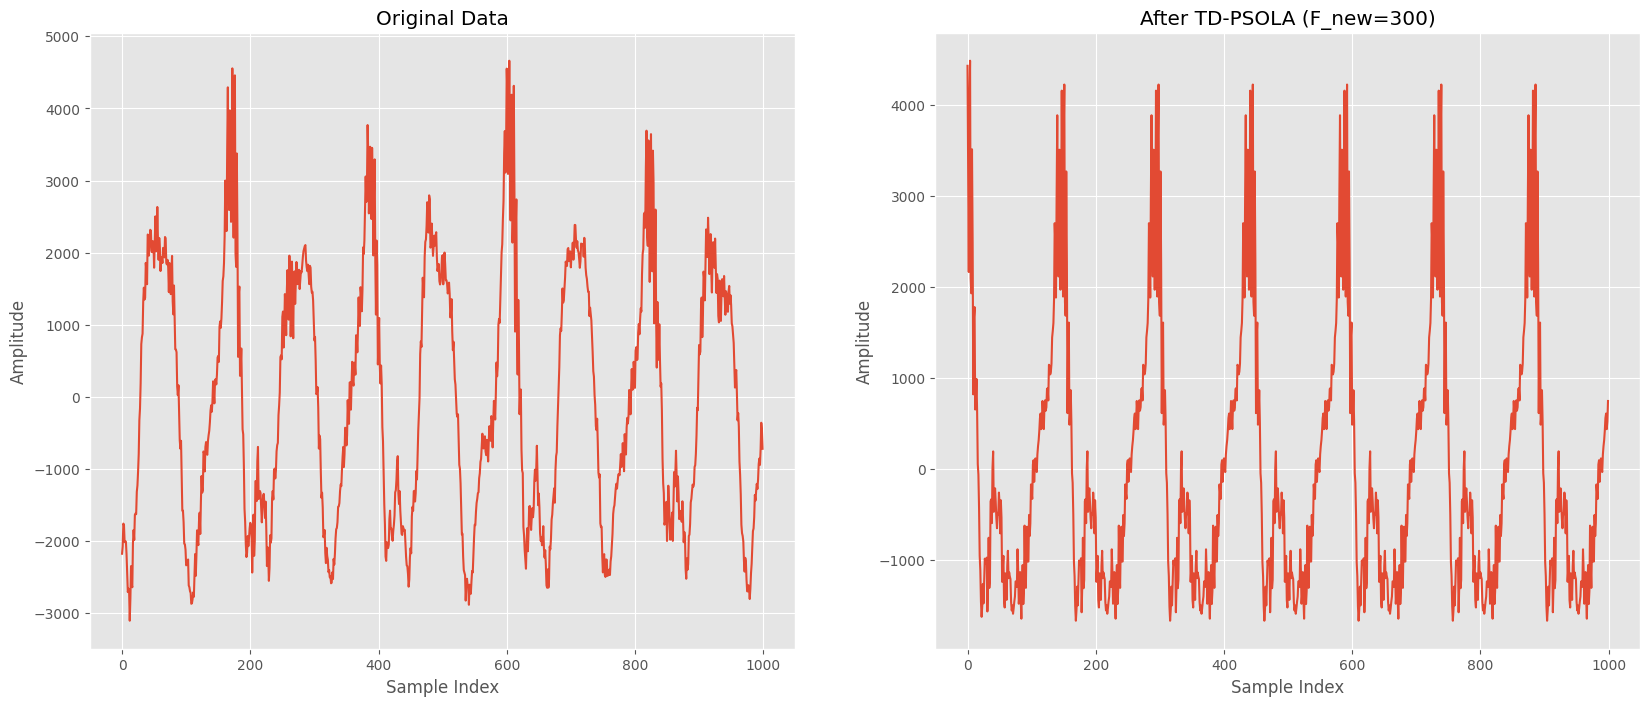

In [ ]:
# print(epoch_marks_orig)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(audio_data[:1000])
plt.title("Original Data")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_data[epoch_marks_orig[:50]], c='blue')

plt.subplot(122)
plt.plot(audio_outs[2][:1000])
plt.title("After TD-PSOLA (F_new=300)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_out[epoch_marks_orig[:50]], c='blue')
plt.show()

In [ ]:
# audio with F_new = 300
Audio(audio_outs[2], rate=F_s)

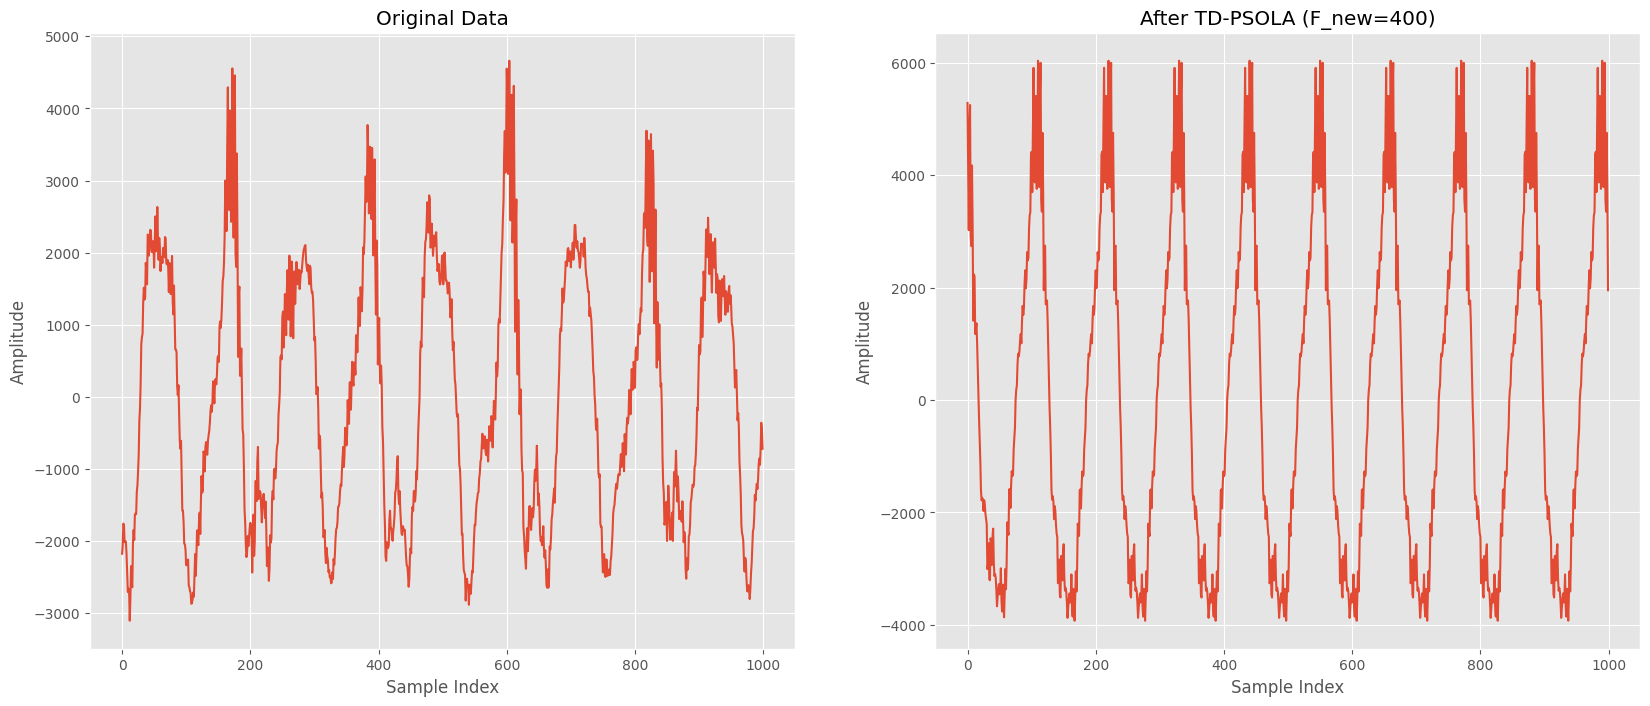

In [ ]:
# print(epoch_marks_orig)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(audio_data[:1000])
plt.title("Original Data")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_data[epoch_marks_orig[:50]], c='blue')

plt.subplot(122)
plt.plot(audio_outs[3][:1000])
plt.title("After TD-PSOLA (F_new=400)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
# plt.scatter(epoch_marks_orig[:50], audio_out[epoch_marks_orig[:50]], c='blue')
plt.show()

In [ ]:
# audio with F_new = 400
Audio(audio_outs[3], rate=F_s)